In [1]:
# installing google maps

!pip install googlemaps

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# importing needed libraries

import googlemaps
import pandas as pd
import numpy as np
import time
import requests
import flask
import json
import seaborn as sns
from flask import Response
from collections import OrderedDict
from google.colab import files
from seaborn import lmplot

In [3]:
# using the google maps api
# due to safety reasons, I stored mine in a text file and did not hard code it
API_KEY = open('API_KEY.txt', 'r').read()
map_client = googlemaps.Client(API_KEY)
location = (39.7684, -86.1581) # indie coordinates
keywords = ['zoo', 'restaurant', 'cafe', 'sports', 'shop', 'museum']
distance = 100000 # 50 km radius , 
business_list = []

# collecting data using a google maps function

for keyword in keywords:
  response = map_client.places(
    location=location,
    query = keyword,
    radius = distance
    )

  business_list.extend(response.get('results'))

# To plan my ideal day in Indianapolis, I sorted the dataframe by the number of user ratings so I know what the most popular places in the city are. I then ensured that the rating was above or at 4.5. I also visited the websites of these businesses to understand when they should be visited.

In [4]:
# cleaning the dataset
df = pd.DataFrame(business_list)
df['url'] = 'https://www.google.com/maps/place/?q=place_id:' + df['place_id']
df_clean = df[['name', 'types', 'formatted_address', 'rating', 'user_ratings_total', 'url']]
df_clean = df_clean.sort_values(by=['user_ratings_total'], ascending=False)
df_clean = df_clean.rename(columns={'name':'Name', 'types':'Type', 'formatted_address':'Address', 'rating':'Rating', 'user_ratings_total':'Num_of_user_ratings'})
df_clean = df_clean[df_clean.Address.str.contains("Indianapolis")]
df_clean = df_clean.reset_index(drop=True)

df_clean.to_csv('possible_locations.csv')
df_clean

,Name,Type,Address,Rating,Num_of_user_ratings,url
0,Indianapolis Zoo,"[zoo, aquarium, tourist_attraction, point_of_i...","1200 W Washington St, Indianapolis, IN 46222, ...",4.5,16737,https://www.google.com/maps/place/?q=place_id:...
1,The Children's Museum of Indianapolis,"[tourist_attraction, museum, point_of_interest...","3000 N Meridian St, Indianapolis, IN 46208, Un...",4.7,13120,https://www.google.com/maps/place/?q=place_id:...
2,Newfields,"[museum, park, point_of_interest, establishment]","4000 N Michigan Rd, Indianapolis, IN 46208, Un...",4.7,4708,https://www.google.com/maps/place/?q=place_id:...
3,Indiana State Museum,"[museum, tourist_attraction, point_of_interest...","650 W Washington St, Indianapolis, IN 46204, U...",4.6,3339,https://www.google.com/maps/place/?q=place_id:...
4,Café Patachou,"[cafe, restaurant, food, point_of_interest, es...","225 W Washington St, Indianapolis, IN 46204, U...",4.5,2058,https://www.google.com/maps/place/?q=place_id:...
5,Charleston's Restaurant,"[restaurant, food, point_of_interest, establis...","6815 82nd St, Indianapolis, IN 46250, United S...",4.5,1691,https://www.google.com/maps/place/?q=place_id:...
6,Eiteljorg Museum,"[tourist_attraction, museum, point_of_interest...","500 W Washington St, Indianapolis, IN 46204, U...",4.6,1658,https://www.google.com/maps/place/?q=place_id:...
7,Sero's Family Restaurant,"[restaurant, food, point_of_interest, establis...","11720 E Washington St, Indianapolis, IN 46229,...",4.5,1310,https://www.google.com/maps/place/?q=place_id:...
8,Aristocrat Pub & Restaurant,"[bar, restaurant, food, point_of_interest, est...","5212 N College Ave, Indianapolis, IN 46220, Un...",4.5,1301,https://www.google.com/maps/place/?q=place_id:...
9,Paragon Restaurant,"[restaurant, food, point_of_interest, establis...","118 S Girls School Rd, Indianapolis, IN 46231,...",4.3,950,https://www.google.com/maps/place/?q=place_id:...


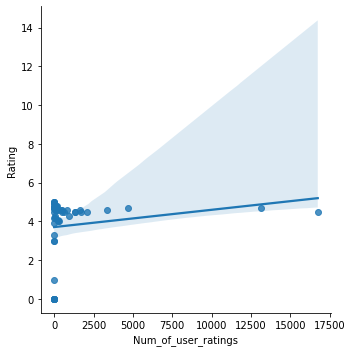

In [5]:
corr_plot = sns.lmplot(x='Num_of_user_ratings', y='Rating', data=df_clean)

# Above is a plot measuring the correlation between the number of user ratings provided and the rating itself. From the low slope and wings that are qute large, we know that there is a negligible amount of correlation between the two variables.

I chose to test these two variables as there are not many quantitative variables in this dataframe. Below is the correlation matrix, so you can see numbers as proof rather than visuals.

In [6]:
corr_matrix = df_clean.corr()
corr_matrix

,Rating,Num_of_user_ratings
Rating,1.000000,0.161456
Num_of_user_ratings,0.161456,1.000000
